## Superposition

## Qiskit Gatter

### Hadamard
The Hadamard gate transfers the state of a qubit into the superposed state (superposition) of $|0\rangle$ and $|1\rangle$ (starting from the initial state $|0\rangle$).
In the Bloch sphere, this would be a rotation of 90° around the y-axis and a roatation of the z-axis by 180°. In matrix representation, the gate would look like this: $H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $ 

#### Example
In the following example, the Hadamard gate is applied to the qubit with the initial state $|0\rangle$ and then the qubit will be measured. Since it is brought into superposition by the Hadamard gate, the qubit collapses to either $|0\rangle$ or $|1\rangle$ when measured.

The matrix representation of the qubit before the measurement is:
$\begin{pmatrix}1 \\ 0\end{pmatrix} \cdot \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} = \begin{pmatrix}\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{pmatrix} $

Applying the Hadamard gate again, one would come out at the initial state of the qubit again.

In [4]:
from qiskit import QuantumCircuit

hadamard = QuantumCircuit(1)
hadamard.h(0)
hadamard.measure_all()
hadamard.draw()

┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

If we now simulate the circuit, we get 50% $|0\rangle$ and 50% $|1\rangle$.

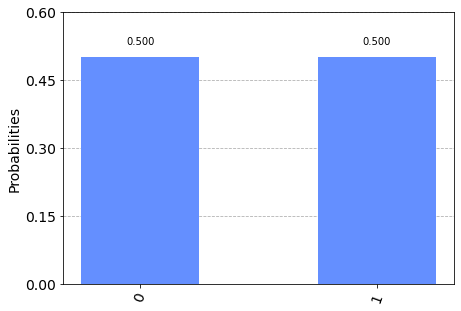

In [11]:
from qiskit.providers.aer import QasmSimulator

simulator = QasmSimulator()
job = simulator.run(hadamard, shots=100000)
result = job.result()

from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(hadamard))

### C-NOT
The C-NOT Gate has two input qubits $q_0$ and $q_1$. The value of $q_0$ remains the same over the whole operation. The value of $q_1$ will be changed in dependence of $q_0$. If $q_0$ is zero the value of $q_1$ will be remained. If $q_0$ is one, the value of $q_1$ will be negates.

$|00\rangle \rightarrow  |00\rangle \\ |01\rangle \rightarrow |01\rangle \\ |10\rangle \rightarrow |11\rangle \\|11\rangle \rightarrow |10\rangle$ 

In the matrix representation: $\begin{pmatrix}1 & 0 & 0 & 0 \\ 0& 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{pmatrix}$

#### Example
In the following circuit we have to qubits. On the first qubit a Hadamard-Gate will be applied. After that the second qubit will be connected to the first one with the C-NOT gate.

In [14]:
cnot = QuantumCircuit(2)
cnot.h(0)
cnot.cx(0, 1)
cnot.measure_all()
cnot.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In the end the there a two possible outcomes. Either both $q_0$ and $q_1$ are zero or one.

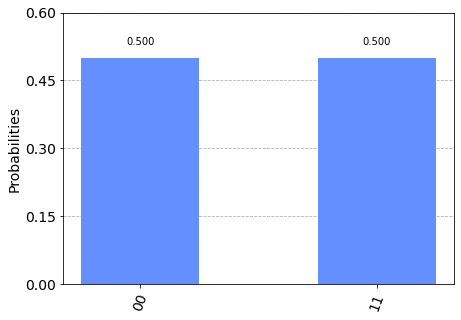

In [18]:
simulator = QasmSimulator()
job = simulator.run(cnot, shots=100000)
result = job.result()

from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(cnot))

### Rotation Gates
#### RXGate
The RXGate is rotation about the x-axis for a single qubit. In the matrix representation the RXGate would be: $$R_x (\theta) = \begin{pmatrix} \cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right) \\ -i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) \end{pmatrix}$$
#### RYGate
The RYGate is rotation about the y-axis for a single qubit. In the matrix representation the RYGate would be: $$R_y (\theta) = \begin{pmatrix} \cos\left(\frac{\theta}{2}\right) & \sin\left(\frac{\theta}{2}\right) \\ \sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) \end{pmatrix}$$
#### RZGate
The RZGate is rotation about the z-axis for a single qubit. In the matrix representation the RZGate would be: $$R_z (\lambda) = \begin{pmatrix} e^{-i\frac{\lambda}{2}} & 0 \\ 0 & e^{-i\frac{\lambda}{2}} \end{pmatrix}$$